In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score

In [58]:
df = pd.read_csv("C:\\Users\\SURABHI\\Downloads\\Customer-Churn-Project-Python\\Customer Churn Project - Python\\customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [62]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

<h3>Data Manipulation</h3>

In [65]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [67]:
customer_5 = df.iloc[:, 4]
print("Customer 5 Column:")
print(customer_5.head())

Customer 5 Column:
0     1
1    34
2     2
3    45
4     2
Name: tenure, dtype: int64


In [69]:
customer_15 = df.iloc[:, 14]
print("\nCustomer 15 Column:")
print(customer_15.head())


Customer 15 Column:
0    Month-to-month
1          One year
2    Month-to-month
3          One year
4    Month-to-month
Name: Contract, dtype: object


In [71]:
senior_male_electronic = df[(df['gender'] == 'Male') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Electronic Check')]
print("\nSenior Male Electronic Customers:")
print(senior_male_electronic.head())


Senior Male Electronic Customers:
Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


In [73]:
customer_total_tenure = df[(df['tenure'] > 70) | (df['MonthlyCharges'] > 100)]
print("\nCustomers with tenure > 70 or Monthly Charges > $100:")
print(customer_total_tenure.head())


Customers with tenure > 70 or Monthly Charges > $100:
    gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
8   Female              0     Yes         No      28          Yes   
12    Male              0     Yes         No      58          Yes   
13    Male              0      No         No      49          Yes   
14    Male              0      No         No      25          Yes   
15  Female              0     Yes        Yes      69          Yes   

   MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
8            Yes     Fiber optic             No           No              Yes   
12           Yes     Fiber optic             No           No              Yes   
13           Yes     Fiber optic             No          Yes              Yes   
14            No     Fiber optic            Yes           No              Yes   
15           Yes     Fiber optic            Yes          Yes              Yes   

   TechSupport StreamingTV StreamingMovies 

In [75]:
two_mail_yes = df[(df['Contract'] == 'Two year') & (df['PaymentMethod'] == 'Mailed Check') & (df['Churn'] == 'Yes')]
print("\nTwo-year contract, Mailed Check, Churn Yes:")
print(two_mail_yes.head())


Two-year contract, Mailed Check, Churn Yes:
Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


In [77]:
customer_333 = df.sample(n=333, random_state=42)
print("\n333 Random Customers:")
print(customer_333.head())


333 Random Customers:
      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
185   Female              0     Yes         No       1           No   
2715    Male              0      No         No      41          Yes   
3825  Female              0     Yes        Yes      52          Yes   
1807  Female              0      No         No       1          Yes   
132     Male              0      No         No      67          Yes   

         MultipleLines InternetService       OnlineSecurity  \
185   No phone service             DSL                   No   
2715               Yes              No  No internet service   
3825                No              No  No internet service   
1807                No     Fiber optic                   No   
132                 No             DSL                   No   

             OnlineBackup     DeviceProtection          TechSupport  \
185                    No                   No                   No   
2715  No internet service  No

In [79]:
churn_counts = df['Churn'].value_counts()
print("\nChurn Counts:")
print(churn_counts)


Churn Counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


<h3>Data Visulization</h3>

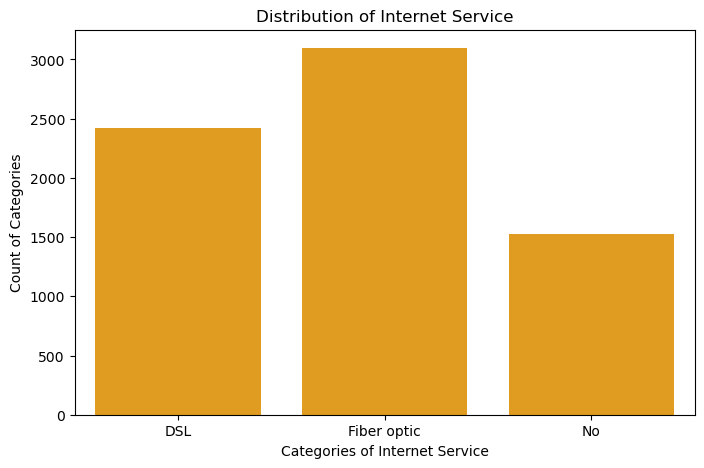

In [82]:
#bar plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='InternetService', color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

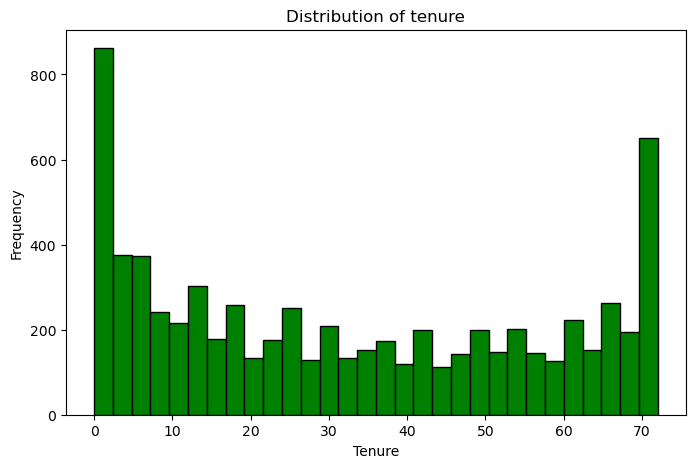

In [84]:
#histogram
plt.figure(figsize=(8, 5))
plt.hist(df['tenure'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

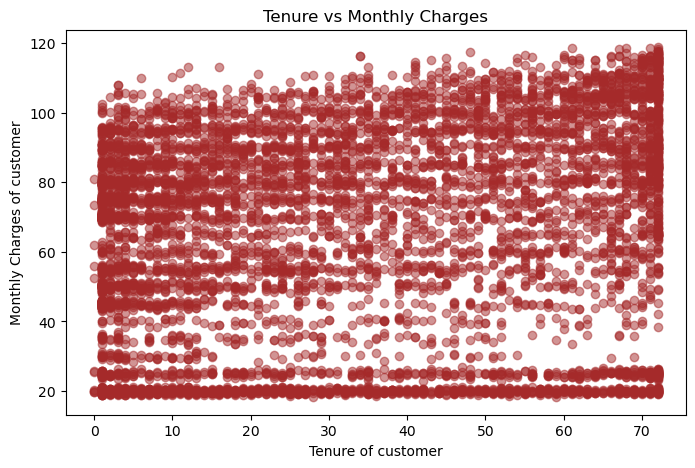

In [86]:
#scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df['tenure'], df['MonthlyCharges'], color='brown', alpha=0.5)
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

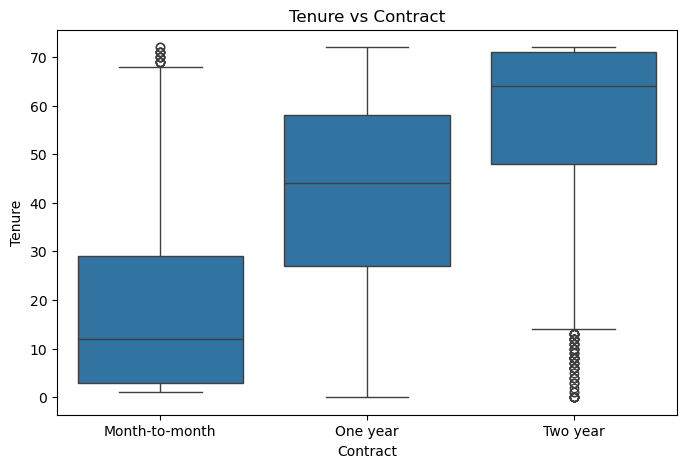

In [88]:
#box plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Contract', y='tenure')
plt.xlabel('Contract')
plt.ylabel('Tenure')
plt.title('Tenure vs Contract')
plt.show()

<h3>linear regression</h3>

In [93]:
X_linear = df[['tenure']]
y_linear = df['MonthlyCharges']

# Splitting data into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X_linear, y_linear, test_size=0.30, random_state=42)

# Build and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on test set
y_pred_linear = linear_model.predict(X_test)

# Calculate the error	
error = y_test - y_pred_linear

# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))

# Display RMSE
print("Root Mean Square Error:", rmse)
print("Error in predictions:",error)

Root Mean Square Error: 29.07936015646814
Error in predictions: 185    -30.306590
2715   -42.185209
3825   -51.475579
1807    21.243410
132    -24.898812
          ...    
5522    15.043410
6377   -10.456590
5500   -12.791303
2392    29.737316
6705   -10.479115
Name: MonthlyCharges, Length: 2113, dtype: float64


<h3>Logistic Regression</h3>

In [98]:
X_logistic = df[['MonthlyCharges']]
y_logistic = df['Churn']

# Splitting data into 65:35 ratio
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y_logistic, test_size=0.35, random_state=42)

# Build and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predict on test set
y_logistic_pred = logistic_model.predict(X_test)

# Confusion matrix and accuracy for logistic regression
logistic_conf_matrix = confusion_matrix(y_test, y_logistic_pred)
logistic_accuracy = accuracy_score(y_test, y_logistic_pred)

print("Confusion Matrix (Simple Logistic Regression):")
print(logistic_conf_matrix)
print("Accuracy (Simple Logistic Regression):", logistic_accuracy)

Confusion Matrix (Simple Logistic Regression):
[[1797    0]
 [ 669    0]]
Accuracy (Simple Logistic Regression): 0.7287104622871047


In [100]:
X_multi_logistic = df[['tenure', 'MonthlyCharges']]
y_multi_logistic = df['Churn']

# Splitting data into 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X_multi_logistic, y_multi_logistic, test_size=0.20, random_state=42)

# Build and train the multiple logistic regression model
multi_logistic_model = LogisticRegression()
multi_logistic_model.fit(X_train, y_train)

# Predict on test set
y_multi_logistic_pred = multi_logistic_model.predict(X_test)

# Confusion matrix and accuracy for multiple logistic regression
multi_logistic_conf_matrix = confusion_matrix(y_test, y_multi_logistic_pred)
multi_logistic_accuracy = accuracy_score(y_test, y_multi_logistic_pred)

print("\nConfusion Matrix (Multiple Logistic Regression):")
print(multi_logistic_conf_matrix)
print("Accuracy (Multiple Logistic Regression):", multi_logistic_accuracy)


Confusion Matrix (Multiple Logistic Regression):
[[944  92]
 [193 180]]
Accuracy (Multiple Logistic Regression): 0.7977288857345636


In [43]:
X_logistic = df[['MonthlyCharges']]
y_logistic = df['Churn']

# Splitting data into 65:35 ratio
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y_logistic, test_size=0.35, random_state=42)

# Build and train the model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict on test set
y_pred = log_model.predict(X_test)

# Confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(conf_matrix)
print(accuracy)

[[1797    0]
 [ 669    0]]
0.7287104622871047


In [45]:
X_multi_logistic = df[['tenure', 'MonthlyCharges']]
y_multi_logistic = df['Churn']

# Splitting data into 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X_multi_logistic, y_multi_logistic, test_size=0.20, random_state=42)

# Build and train the model
multi_log_model = LogisticRegression()
multi_log_model.fit(X_train, y_train)

# Predict on test set
y_multi_pred = multi_log_model.predict(X_test)

# Confusion matrix and accuracy for multiple logistic regression
multi_conf_matrix = confusion_matrix(y_test, y_multi_pred)
multi_accuracy = accuracy_score(y_test, y_multi_pred)

print(multi_conf_matrix)
print(multi_accuracy)

[[944  92]
 [193 180]]
0.7977288857345636


<h3>Decision tree</h3>

In [47]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Define independent and dependent variables
X = df[['tenure']]  # Independent variable
y = df['Churn']     # Dependent variable

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Build and train the decision tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree_model.predict(X_test)

# Compute confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Display results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)

Confusion Matrix:
[[951  85]
 [257 116]]

Accuracy: 0.7572746628814763


<h3>Randon forest</h3>

In [52]:
X_rf = df[['tenure', 'MonthlyCharges']]
y_rf = df['Churn']

# Splitting data into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.30, random_state=42)

# Build and train the random forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict on test set
y_rf_pred = random_forest_model.predict(X_test)

# Confusion matrix and accuracy for random forest
rf_conf_matrix = confusion_matrix(y_test, y_rf_pred)
rf_accuracy = accuracy_score(y_test, y_rf_pred)

print("\nConfusion Matrix (Random Forest Model):")
print(rf_conf_matrix)
print("Accuracy (Random Forest Model):", rf_accuracy)


Confusion Matrix (Random Forest Model):
[[1341  198]
 [ 308  266]]
Accuracy (Random Forest Model): 0.7605300520586843
